<a href="https://colab.research.google.com/github/shaun-mia/HackerRank_Python_Solutions/blob/main/chronic_kidney_disease_prediction(201_15_3200).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier
from inspect import signature
from sklearn.metrics import f1_score

In [ ]:
df = pd.read_csv("chronic-kidney-disease-prediction.csv") 


In [ ]:
df.head(6)

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
5,90.0,1.015,3.0,0.0,1.0,25.0,1.1,142.00,3.20,12.2,7800.0,4.40,1.0,1


In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
df.head(6)

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
5,90.0,1.015,3.0,0.0,1.0,25.0,1.1,142.00,3.20,12.2,7800.0,4.40,1.0,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


In [ ]:
df.corr(method='pearson', min_periods=1)

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
Bp,1.000000,-0.164057,0.146060,0.190277,-0.151478,0.184173,0.144469,-0.103383,0.066791,-0.279441,0.025963,-0.220827,0.268003,0.290145
Sg,-0.164057,1.000000,-0.460835,-0.292053,0.253894,-0.249263,-0.176141,0.217456,-0.063450,0.492103,-0.206880,0.443437,-0.318956,-0.659504
Al,0.146060,-0.460835,1.000000,0.262564,-0.374484,0.405035,0.229396,-0.270709,0.114484,-0.548681,0.200664,-0.454131,0.478309,0.598389
Su,0.190277,-0.292053,0.262564,1.000000,-0.092940,0.126074,0.094568,-0.053448,0.180098,-0.156875,0.159033,-0.163825,0.253179,0.294555
Rbc,-0.151478,0.253894,-0.374484,-0.092940,1.000000,-0.236270,-0.138391,0.140568,0.018164,0.280991,-0.002205,0.202298,-0.139342,-0.282642
Bu,0.184173,-0.249263,0.405035,0.126074,-0.236270,1.000000,0.581176,-0.307357,0.336954,-0.540699,0.041530,-0.465947,0.387503,0.371982
Sc,0.144469,-0.176141,0.229396,0.094568,-0.138391,0.581176,1.000000,-0.624493,0.205361,-0.342053,-0.005420,-0.323056,0.273904,0.294076
Sod,-0.103383,0.217456,-0.270709,-0.053448,0.140568,-0.307357,-0.624493,1.000000,0.067414,0.333604,0.006334,0.316883,-0.306501,-0.342268
Pot,0.066791,-0.063450,0.114484,0.180098,0.018164,0.336954,0.205361,0.067414,1.000000,-0.100612,-0.074057,-0.120418,0.057028,0.077063
Hemo,-0.279441,0.492103,-0.548681,-0.156875,0.280991,-0.540699,-0.342053,0.333604,-0.100612,1.000000,-0.153806,0.681864,-0.576932,-0.729537


In [ ]:
x = df.drop(['Class'],axis=1)
y = df['Class']
lab_enc=LabelEncoder()
y=lab_enc.fit_transform(y)

In [ ]:
print(x)

        Bp     Sg   Al   Su  Rbc     Bu     Sc     Sod    Pot   Hemo     Wbcc  \
0     80.0  1.020  1.0  0.0  1.0   36.0   1.20  137.53   4.63  15.40   7800.0   
1     50.0  1.020  4.0  0.0  1.0   18.0   0.80  137.53   4.63  11.30   6000.0   
2     80.0  1.010  2.0  3.0  1.0   53.0   1.80  137.53   4.63   9.60   7500.0   
3     70.0  1.005  4.0  0.0  1.0   56.0   3.80  111.00   2.50  11.20   6700.0   
4     80.0  1.010  2.0  0.0  1.0   26.0   1.40  137.53   4.63  11.60   7300.0   
5     90.0  1.015  3.0  0.0  1.0   25.0   1.10  142.00   3.20  12.20   7800.0   
6     70.0  1.010  0.0  0.0  1.0   54.0  24.00  104.00   4.00  12.40   8406.0   
7     76.0  1.015  2.0  4.0  1.0   31.0   1.10  137.53   4.63  12.40   6900.0   
8    100.0  1.015  3.0  0.0  1.0   60.0   1.90  137.53   4.63  10.80   9600.0   
9     90.0  1.020  2.0  0.0  0.0  107.0   7.20  114.00   3.70   9.50  12100.0   
10    60.0  1.010  2.0  4.0  1.0   55.0   4.00  137.53   4.63   9.40   8406.0   
11    70.0  1.010  3.0  0.0 

In [ ]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)
y_predi=clf.predict(X_test)

In [ ]:
print("training dataset:{:.2f}".format(clf.score(X_train,Y_train)))
print("testing dataset:{:.3f}".format(accuracy_score(Y_test, y_predi)))

training dataset:1.00
testing dataset:1.000


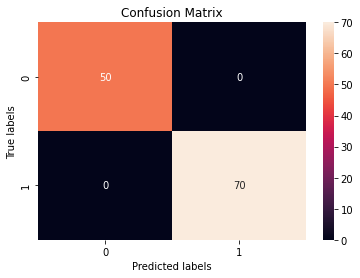

In [ ]:
c=pd.DataFrame(
    confusion_matrix(Y_test, y_predi),columns=['Predicted:0', 'Predicted:1'],
    index=['Actual:0', 'Actual:1']
)
ax= plt.subplot()
sns.heatmap(c, annot=True, ax = ax); 
#annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);


In [ ]:
newdf = pd.DataFrame({'Actual': Y_test, 'Predicted':y_predi})
newdf

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
5,0,0
6,1,1
7,0,0
8,1,1
9,0,0


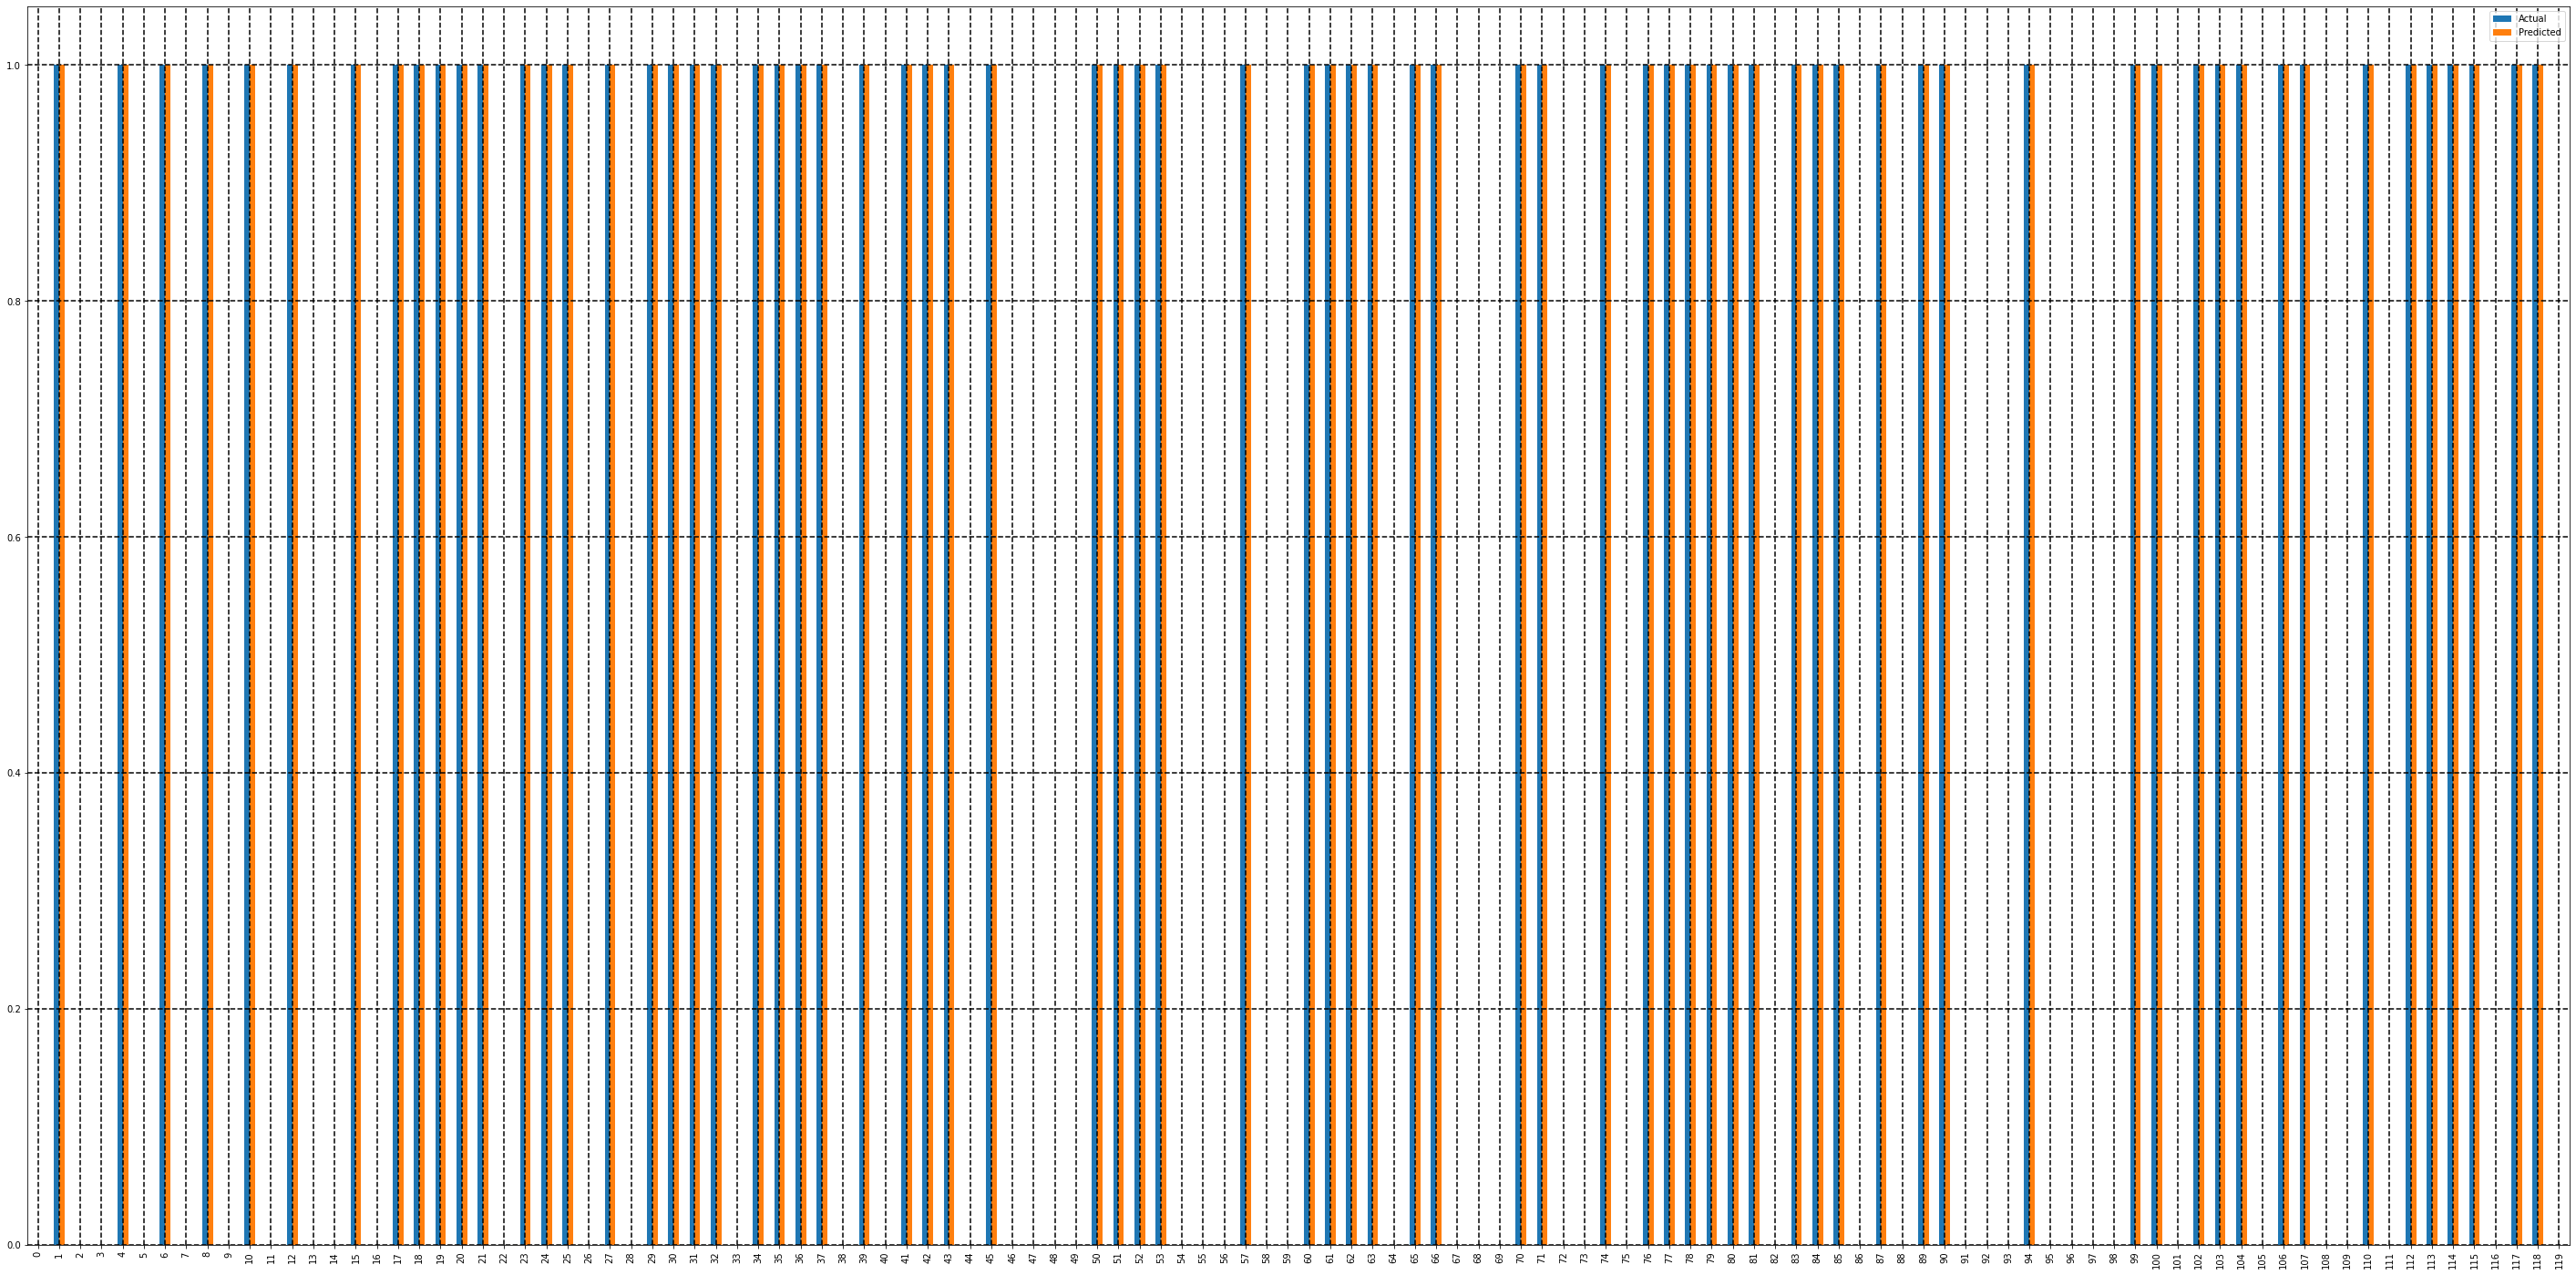

In [ ]:
df1 = newdf
df1.plot(kind='bar',figsize=(50,25))
plt.grid(which='major', linestyle='--', linewidth='1.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='pink')
plt.show()

In [ ]:
rrc=recall_score(Y_test, y_predi)
print(rrc)

1.0


In [ ]:
rps=precision_score(Y_test, y_predi)
print(rps)

1.0


In [ ]:
rfs=f1_score(Y_test,y_predi)
print(rfs)

1.0


Text(0.5, 1.0, '2-class Precision-Recall curve: A=1.00')

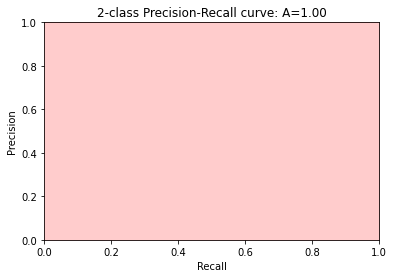

In [ ]:
precision, recall, threshold = precision_recall_curve(Y_test, y_predi)
average_precision = average_precision_score(Y_test, y_predi)
step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='r', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: A={0:0.2f}'.format(average_precision))